# What is causing customer churn?

### Import Data

In [1]:
from env import get_connection
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from scipy import stats
# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire
#import my own prepare module
import prepare
# import my own function module
import function

seed = 42

## Acquire the data

- I originally acquired the data from SQL Ace, I then saved it to a csv
- The dataset, before preparation has 25 columns and 7043 rows
- Each observation (row) represents details about each individual customer
- Each column represents variables associated with the observations of each customer

In [2]:
df = acquire.get_telco_data()

#### ----------------------------------------Checking the data----------------------------------------

In [3]:
df.head()

,Unnamed: 0,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,2,1,1,2,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


## Prepare the data

- As part of my planning step, I had some ideas of the questions I wanted to answer, 
    This helped me decide what information was truly necessary for me to reach my conlcusions based on 
    what I was asking
- Knowing my preliminary questions, I decided to drop numerous columns I felt held 
    little to no value to help me reach my conclusions
- During some initial exploration of the data, I noticed the total_charges column had 11 rows of non-values, 
    based on the fact that I still had 7032 rows (or observations) left, I decided to remove those rows
- Once I felt I had all the data I needed and wanted to explore, I created dummy variables to create binary 
    values for my data

In [4]:
df = function.telco_churn(df)

In [5]:
df = function.cleanup(df)

In [6]:
df.head()

,customer_id,tenure,monthly_charges,total_charges,online_security_na,online_security_yes,online_backup_na,online_backup_yes,device_prot_na,device_protection_yes,tech_support_na,tech_support_yes,paperless_billing_yes,churn_yes,has_fiber,internet_service_type_na
0,0002-ORFBO,9,65.6,593.30,0,0,0,1,0,0,0,1,1,0,0,0
1,0003-MKNFE,9,59.9,542.40,0,0,0,0,0,0,0,0,0,0,0,0
2,0004-TLHLJ,4,73.9,280.85,0,0,0,0,0,1,0,0,1,1,1,0
3,0011-IGKFF,13,98.0,1237.85,0,0,0,1,0,1,0,0,1,1,1,0
4,0013-EXCHZ,3,83.9,267.40,0,0,0,0,0,0,0,1,1,1,1,0


## Explore the data

- Does price affect whether or not a customer will churn?

- Does tenure affect whether or not a customer will churn?

- Does customer service/support affect whether or not a customer will churn?

- Does a bad internet service product affect whether or not a customer will churn?


Each question should be answered in natural language
Two questions must be supported by a statistical test, but you may choose to support more than two
See the following example, and read the comments in the next cell

#### ----------------------------------------Splitting the data and checking the sizes of train, validate and test----------------------------------------

In [7]:
train, validate, test = prepare.train_val_test(df, 'churn_yes')
train.shape, validate.shape, test.shape

((4922, 16), (1266, 16), (844, 16))

### 1. Does price affect whether or not a customer churns? 

- I decided to use a T-Test here as I was dealing with one continuous variable (monthly charges) 
    and one discrete variable (churn)

# Price T-Test

### Hypotheses for price T-Test
- H
0
: Mean of monthly charges of churned customers <= Mean of monthly charges of customers who haven't churned
- H
a
: Mean of monthly charges of churned customers > Mean of monthly charges of customers who haven't churned

<AxesSubplot:>

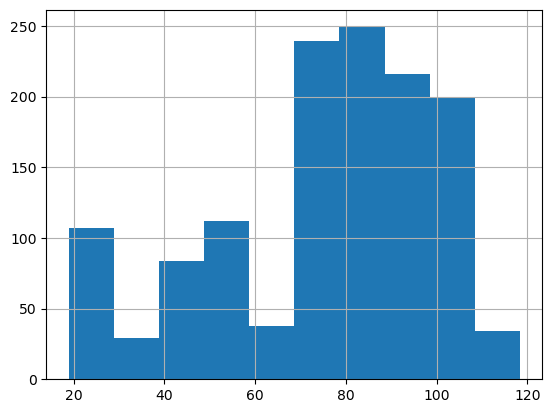

In [8]:
churned_price = train[train.churn_yes == True].monthly_charges

churned_price.hist()

<AxesSubplot:>

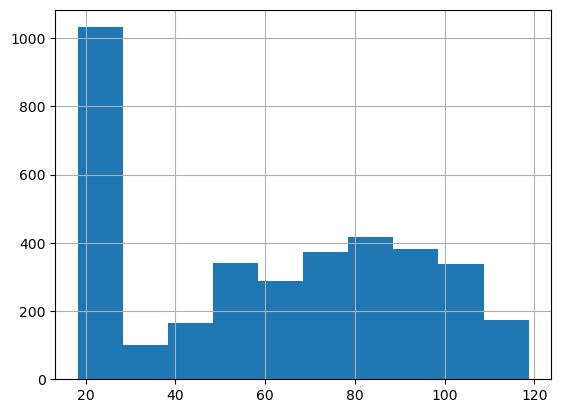

In [9]:
churn_no_price = train[train.churn_yes == False].monthly_charges

churn_no_price.hist()

In [10]:
# create bins of equal intervals
monthly_charges_bins = pd.cut(train.monthly_charges, 5)

<AxesSubplot:xlabel='monthly_charges', ylabel='count'>

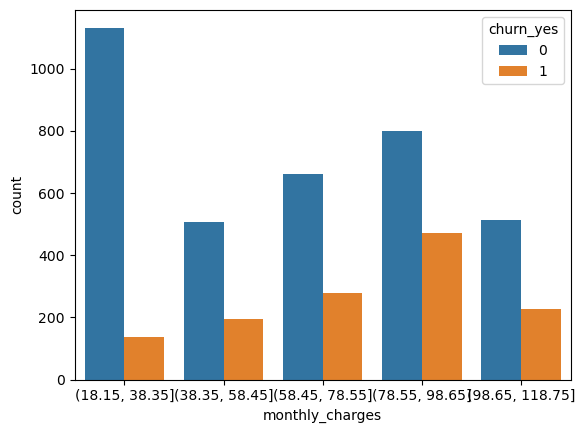

In [11]:
sns.countplot(hue = train.churn_yes, x = monthly_charges_bins, data=train)

<AxesSubplot:xlabel='churn_yes', ylabel='monthly_charges'>

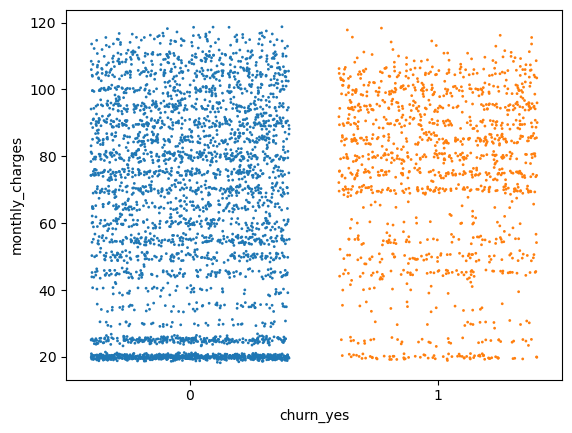

In [12]:
sns.stripplot(y = train.monthly_charges, x = train.churn_yes, data = train, size = 2, jitter = .4)

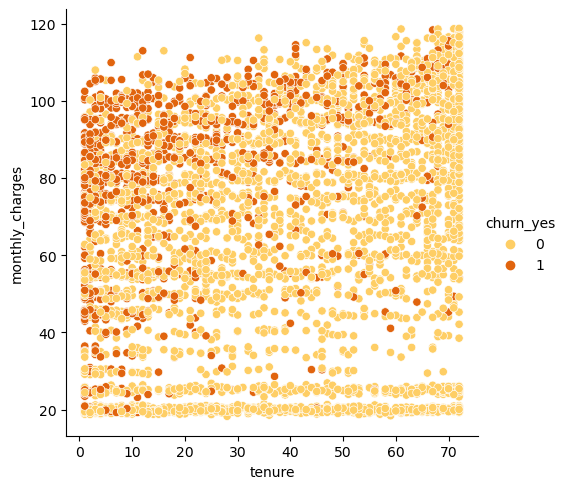

In [13]:
sns.relplot(train.tenure, train.monthly_charges, hue = 'churn_yes', data = train, palette = 'YlOrBr')

In [14]:
alpha = .05

print('Variance of the customers that churned based on price is:', churned_price.var())
print('Variance of the customers that did not churn based on price is:', churn_no_price.var())

t, p = stats.ttest_ind(churned_price, churn_no_price, equal_var=False)
print(t, p / 2)

print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)

if p / 2 > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis because the findings are statistically significant.",
          "\nWe can reasonably say that there is a relationship between customers churning and",
          "\nwhat they are being charged on a monthly basis.")
    
    

Variance of the customers that churned based on price is: 604.2218760704544
Variance of the customers that did not churn based on price is: 971.3562109450843
16.015848234596906 1.0713681531826326e-55
is p/2 < alpha?  True
is t > 0?  True
We reject the null hypothesis because the findings are statistically significant. 
We can reasonably say that there is a relationship between customers churning and 
what they are being charged on a monthly basis.


# Tenure T-Test

### Hypotheses for tenure T-Test
- H
0
: Length of tenure of churned customers >= length of tenure of customers who haven't churned
- H
a
: Length of tenure of churned customers < length of tenure of customers who haven't churned

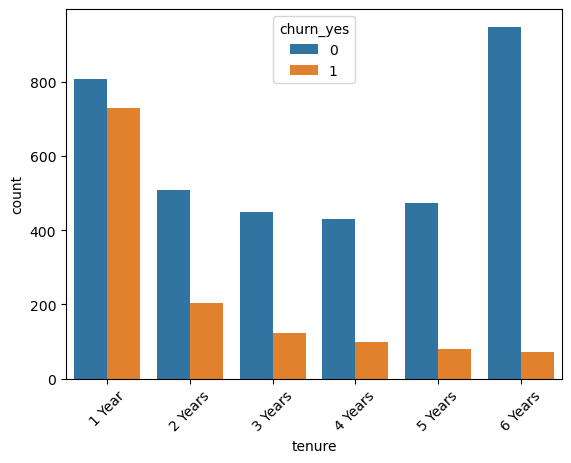

In [15]:
tenure_bins = pd.cut(train.tenure, 6, precision = 0)
tenure_bins.value_counts()
labels = ['1 Year', '2 Years', '3 Years', '4 Years', '5 Years', '6 Years']

sns.countplot(hue = train.churn_yes, x = tenure_bins, data = train)
plt.xticks(ticks = (0, 1, 2, 3, 4, 5), rotation = 45, labels = labels)

plt.show()

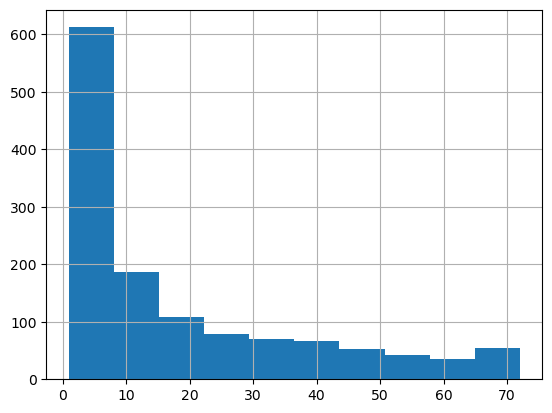

<AxesSubplot:>

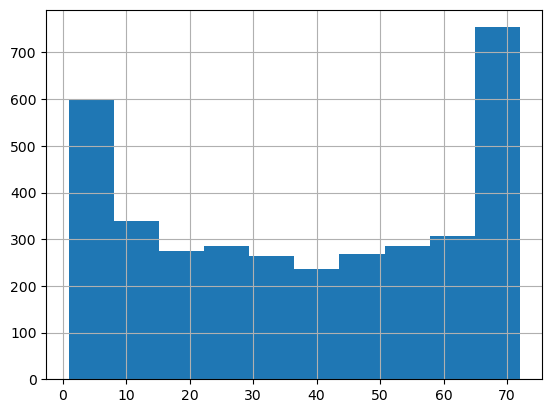

In [16]:
churned_tenure = train[train.churn_yes == True].tenure
churned_tenure.hist()
plt.show()

churned_no_tenure = train[train.churn_yes == False].tenure
churned_no_tenure.hist()

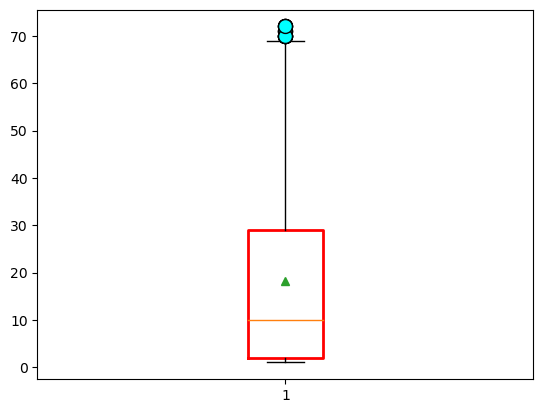

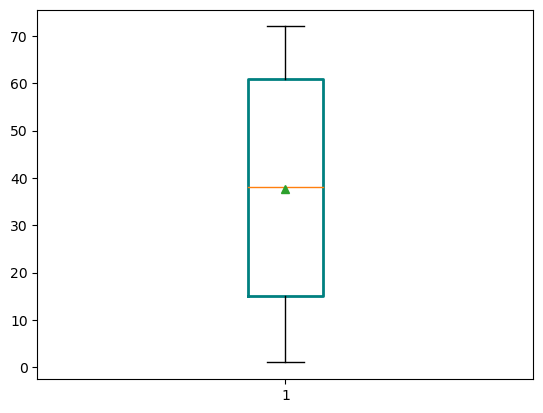

In [17]:
boxprops1 = dict(linestyle='-', linewidth=2, color='red')
boxprops2 = dict(linestyle='-', linewidth=2, color='teal')
flierprops = dict(marker='o', markerfacecolor='cyan', markersize=10, linestyle='none')

plt.boxplot(train.tenure[train.churn_yes == True], showmeans = True, 
            boxprops = boxprops1, flierprops = flierprops)
plt.show()

plt.boxplot(train.tenure[train.churn_yes == False], showmeans = True, 
            boxprops = boxprops2)
plt.show()

In [18]:
print(churned_tenure.var())
print(churned_no_tenure.var())
t, p = stats.ttest_ind(churned_tenure, churned_no_tenure, equal_var=False)
print(t, p / 2)

print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)

if p / 2 > alpha:
    print("We fail to reject the null hypothesis")
elif t > 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis because the findings are statistically significant.",
          "\nWe can reasonably say that there is a relationship between customers churning and",
          "\nhow long they have been at the company")

390.4641830978354
586.8038736248961
-28.883855329091954 3.43291294666965e-161
is p/2 < alpha?  True
is t > 0?  False
We reject the null hypothesis because the findings are statistically significant. 
We can reasonably say that there is a relationship between customers churning and 
how long they have been at the company


# Customer Support

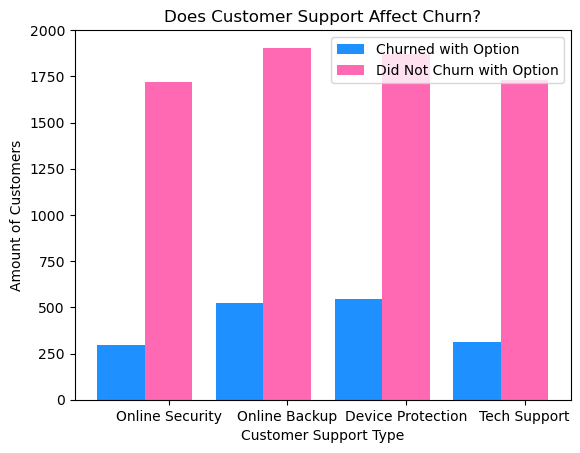

<function matplotlib.pyplot.show(close=None, block=None)>

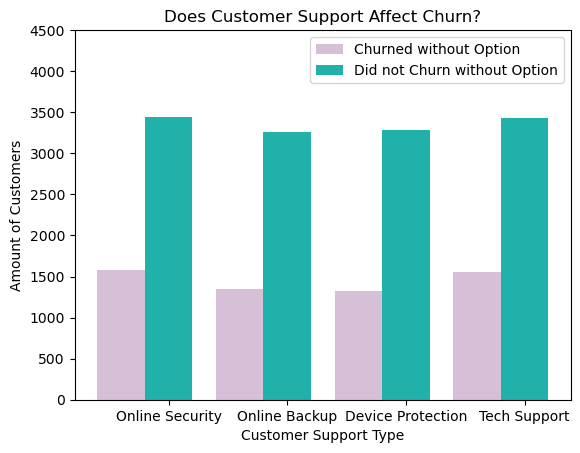

In [19]:
cust_sppt_churned = (295, 523, 545, 310)
cust_sppt_no_churned = (1720, 1902, 1873, 1730)

customer_support = ('Online Security', 'Online Backup', 'Device Protection', 'Tech Support')

width = 0.4
index = np.arange(4)
plt.bar(index, cust_sppt_churned, width = width, 
        label = 'Churned with Option', color = 'dodgerblue')
plt.bar(index + width, cust_sppt_no_churned, width = width, 
        label = 'Did Not Churn with Option', color = 'hotpink')

plt.xticks(index + width, customer_support)
plt.ylim (0, 2000)
plt.title('Does Customer Support Affect Churn?')
plt.ylabel('Amount of Customers')
plt.xlabel('Customer Support Type')
plt.legend()
plt.show()

no_cust_sppt_no_churn = (3443, 3261, 3290, 3433)
no_cust_sppt_churn = (1574, 1346, 1324, 1559)

plt.bar(index, no_cust_sppt_churn, width = width, 
        label = 'Churned without Option', color = 'thistle')
plt.bar(index + width, no_cust_sppt_no_churn, width = width, 
        label = 'Did not Churn without Option', color = 'lightseagreen')


plt.xticks(index + width, customer_support)
plt.ylim (0, 4500)
plt.title('Does Customer Support Affect Churn?')
plt.ylabel('Amount of Customers')
plt.xlabel('Customer Support Type')
plt.legend()
plt.show

<AxesSubplot:xlabel='tech_support_yes', ylabel='count'>

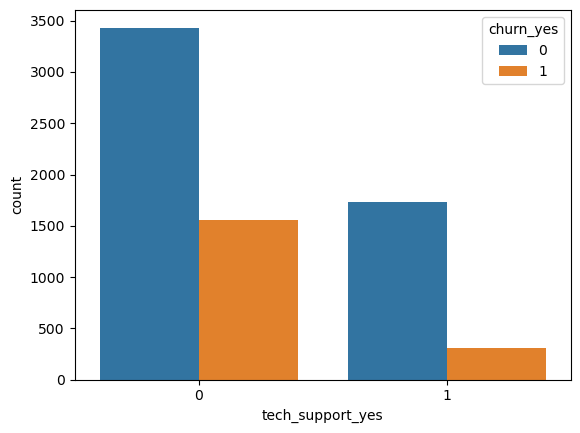

In [20]:
sns.countplot(df['tech_support_yes'], hue = df.churn_yes)

### Tech Support Chi^2 test

In [21]:
tech_sppt = pd.crosstab(train.churn_yes, train.tech_support_yes)
tech_sppt 

tech_support_yes,0,1
churn_yes,,
0,2399,1215
1,1090,218


In [22]:
chi2, p, degf, expected = stats.chi2_contingency(tech_sppt)

In [23]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(tech_sppt.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

Observed Values

[[2399 1215]
 [1090  218]]
---
Expected Values

[[2561 1052]
 [ 927  380]]
---

chi^2 = 132.9202
p     = 0.0000


# Bad Product

# Fiber

In [24]:
fiber = pd.crosstab(train.churn_yes, train['has_fiber'])
fiber

has_fiber,0,1
churn_yes,,
0,2369,1245
1,398,910


In [25]:
chi2, p, degf, expected = stats.chi2_contingency(fiber)

In [26]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(fiber.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

Observed Values

[[2369 1245]
 [ 398  910]]
---
Expected Values

[[2031 1582]
 [ 735  572]]
---

chi^2 = 479.9141
p     = 0.0000


<AxesSubplot:xlabel='has_fiber', ylabel='count'>

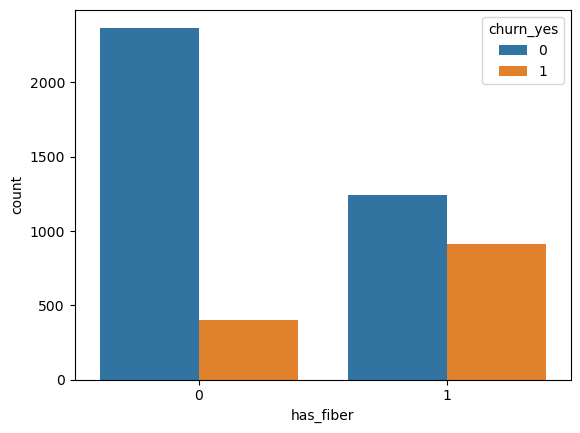

In [27]:
sns.countplot(train['has_fiber'], hue = train.churn_yes)

# Baseline Model

In [28]:
baseline_df = pd.DataFrame({'actual': df.churn_yes == True, 
                            'prediction': df.churn_yes == True})
baseline_df['baseline_prediction'] = False

baseline_df

,actual,prediction,baseline_prediction
0,False,False,False
1,False,False,False
2,True,True,False
3,True,True,False
4,True,True,False
...,...,...,...
7038,False,False,False
7039,True,True,False
7040,False,False,False
7041,False,False,False


In [29]:
baseline_accuracy = (baseline_df.baseline_prediction == baseline_df.actual).mean()

print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 73.42%


##### So my baseline predicted that 73.42% of the time, a customer did not churn

# Decision Tree Model

In [30]:
X_train = train.drop(columns=['churn_yes', 'customer_id'])
y_train = train.churn_yes

X_validate = validate.drop(columns=['churn_yes', 'customer_id'])
y_validate = validate.churn_yes

X_test = test.drop(columns=['churn_yes', 'customer_id'])
y_test = test.churn_yes

In [31]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [32]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)


In [33]:
clf.classes_

array([0, 1], dtype=uint8)

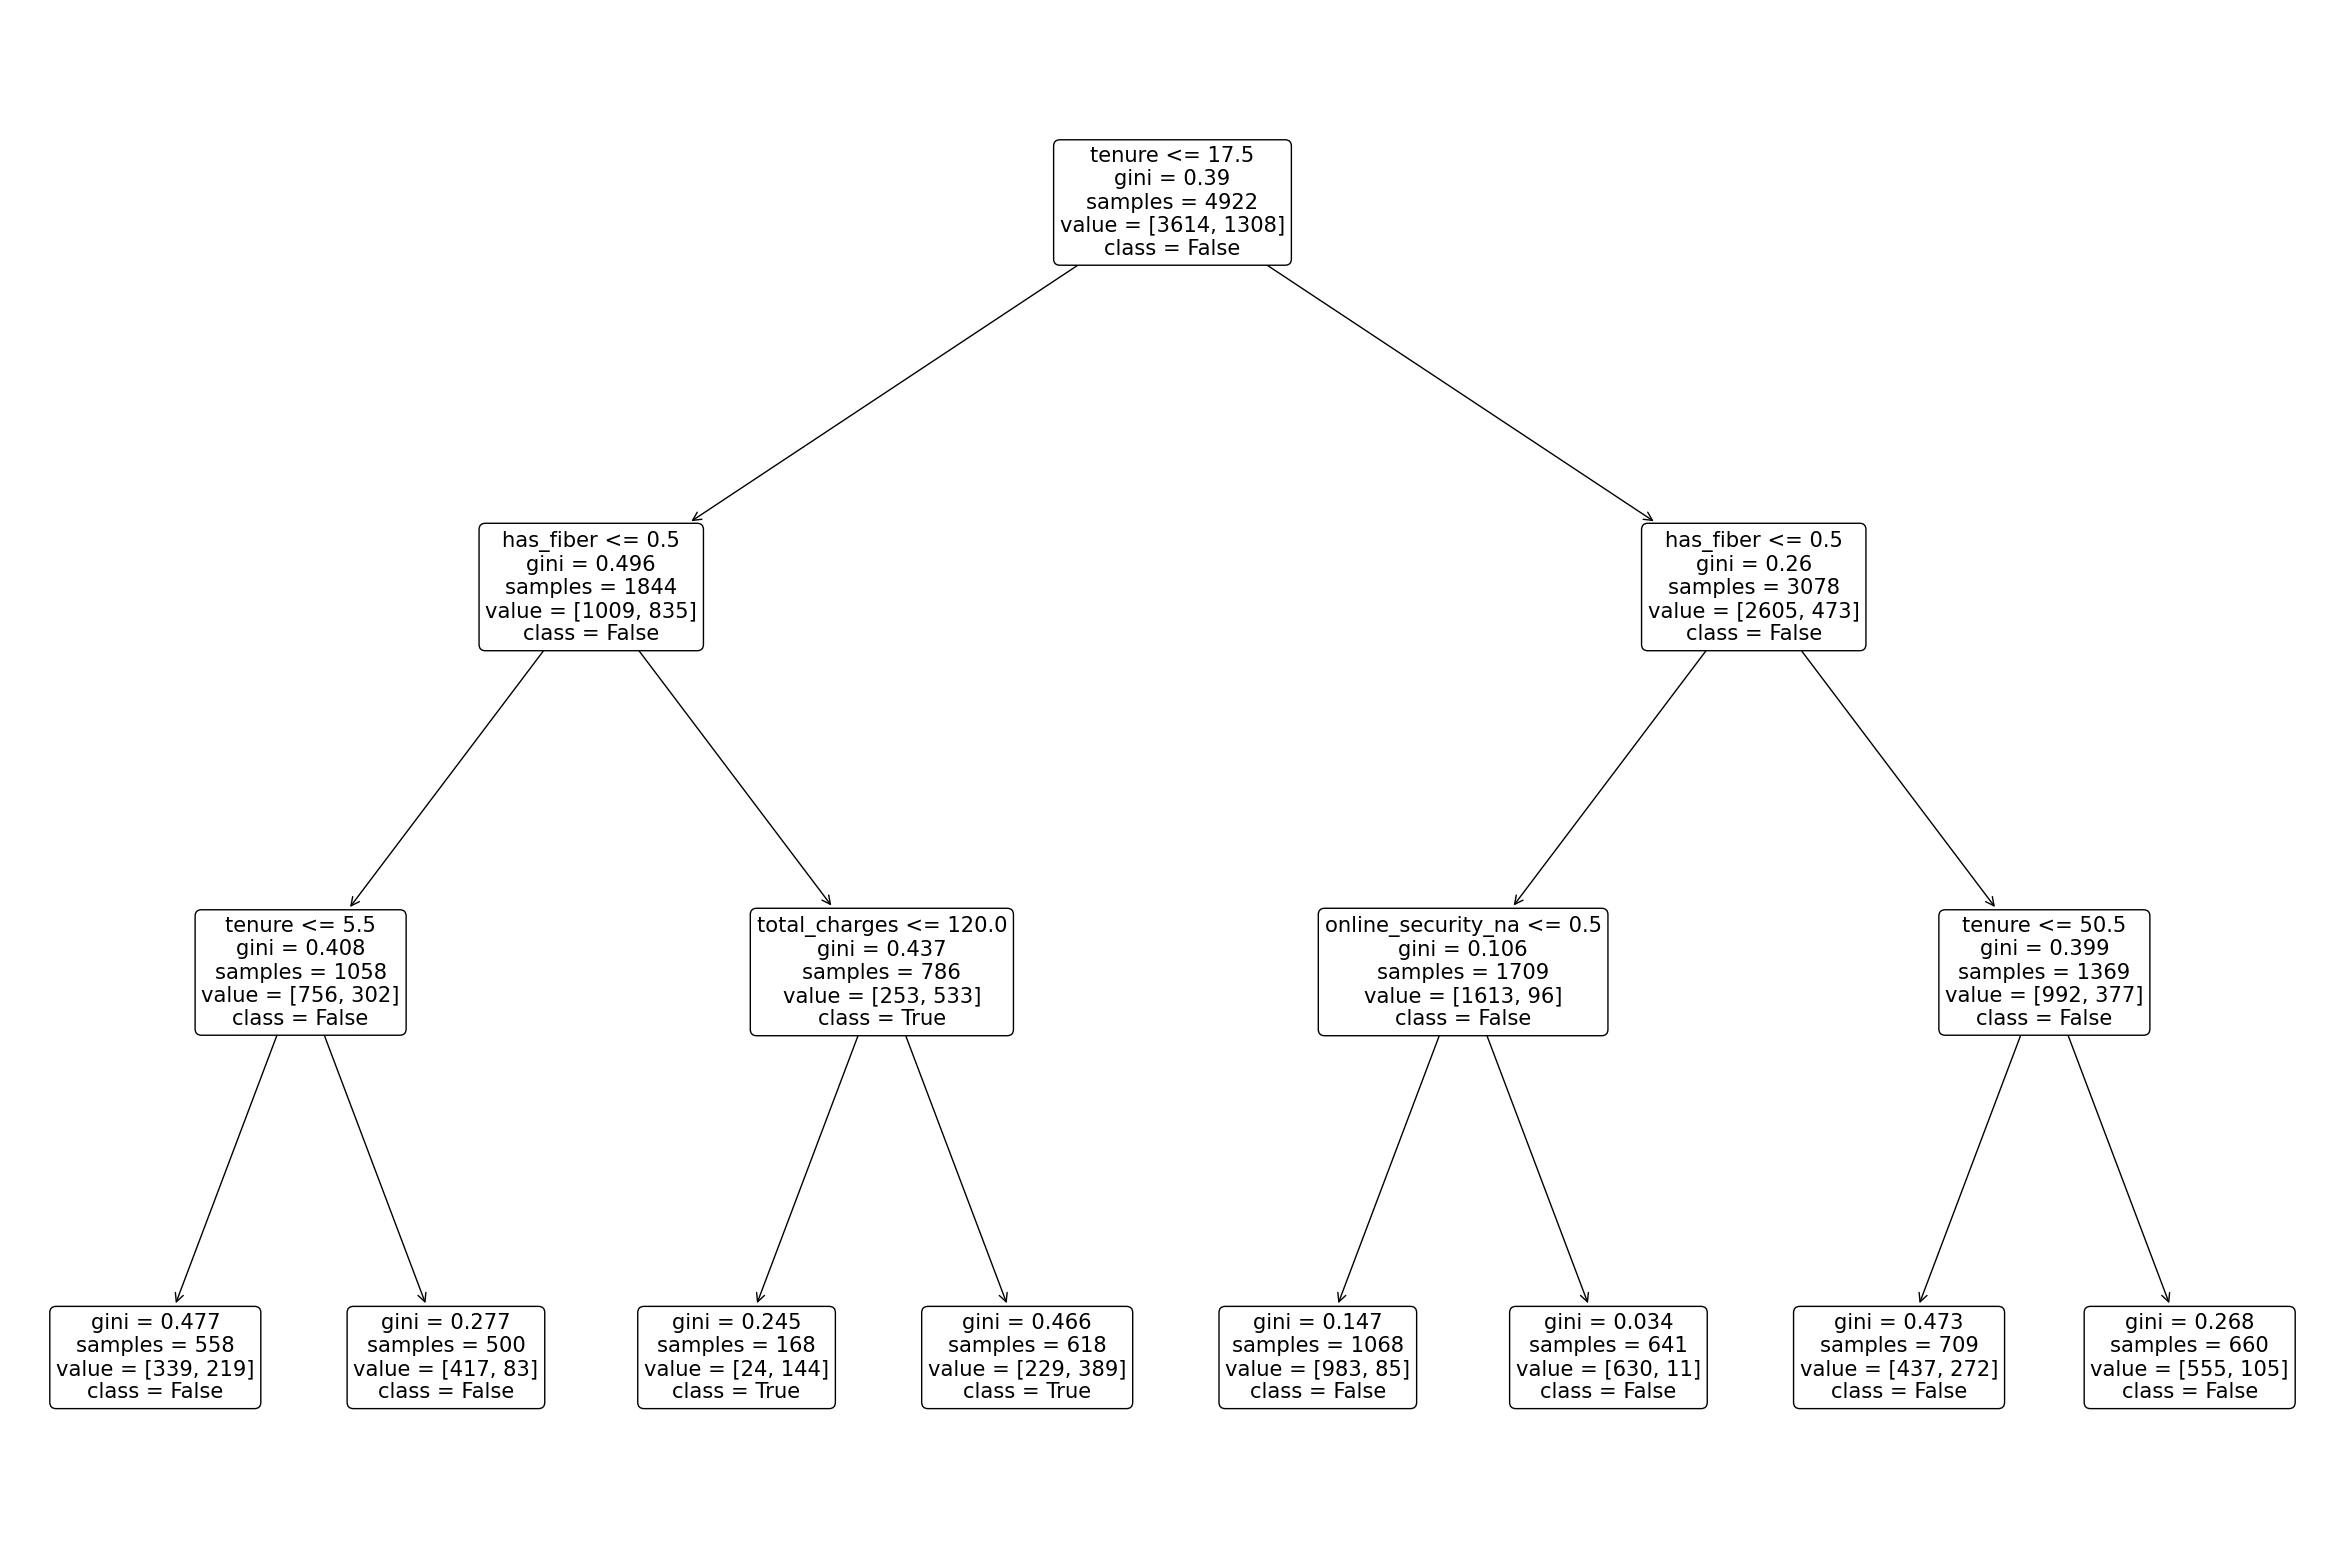

In [34]:
plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names=X_train.columns, class_names=['False', 'True'], rounded=True)
plt.show()

In [35]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
print(y_pred[0:5])

y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

[1 0 0 0 0]


array([[0.37055016, 0.62944984],
       [0.98283931, 0.01716069],
       [0.834     , 0.166     ],
       [0.84090909, 0.15909091],
       [0.84090909, 0.15909091]])

In [36]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [37]:
# confusion matrix

confusion_matrix(y_train, y_pred)


array([[3361,  253],
       [ 775,  533]])

In [38]:
y_train.value_counts()


0    3614
1    1308
Name: churn_yes, dtype: int64

In [39]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)


,0,1
0,3361,253
1,775,533


In [40]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3614
           1       0.68      0.41      0.51      1308

    accuracy                           0.79      4922
   macro avg       0.75      0.67      0.69      4922
weighted avg       0.78      0.79      0.77      4922



In [41]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.79


In [42]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.87       929
           1       0.67      0.42      0.52       337

    accuracy                           0.79      1266
   macro avg       0.74      0.67      0.69      1266
weighted avg       0.78      0.79      0.77      1266



# RANDOM FOREST MODEL

In [43]:
X_train_rf = train.drop(columns=['churn_yes', 'customer_id'])
y_train_rf = train.churn_yes

X_validate_rf = validate.drop(columns=['churn_yes', 'customer_id'])
y_validate_rf = validate.churn_yes

X_test_rf = test.drop(columns=['churn_yes', 'customer_id'])
y_test_rf = test.churn_yes

In [44]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)


In [45]:
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [46]:
print(rf.feature_importances_)

[0.2658814  0.07643607 0.13815769 0.03512892 0.05596085 0.03343374
 0.02293229 0.04511194 0.00985282 0.03700359 0.04077131 0.02126962
 0.18674143 0.03131833]


In [47]:
y_pred_rf = rf.predict(X_train_rf)

In [48]:
y_pred_proba_rf = rf.predict_proba(X_train_rf)

In [49]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train_rf, y_train_rf)))

Accuracy of random forest classifier on training set: 0.79


In [50]:
print(confusion_matrix(y_train_rf, y_pred_rf))

[[3414  200]
 [ 838  470]]


In [51]:
print(classification_report(y_train_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      3614
           1       0.70      0.36      0.48      1308

    accuracy                           0.79      4922
   macro avg       0.75      0.65      0.67      4922
weighted avg       0.78      0.79      0.76      4922



In [52]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate_rf, y_validate_rf)))

Accuracy of random forest classifier on test set: 0.79


In [76]:
y_pred_rf = rf.predict(X_validate_rf)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       929
           1       0.69      0.36      0.47       337

    accuracy                           0.79      1266
   macro avg       0.75      0.65      0.67      1266
weighted avg       0.77      0.79      0.76      1266



In [87]:
rf_metrics = []


tree = RandomForestClassifier(max_depth= 3, random_state = seed)
tree = tree.fit(X_train_rf, y_train_rf)
in_sample_accuracy = tree.score(X_train_rf, y_train_rf)
out_of_sample_accuracy = tree.score(X_validate_rf, y_validate_rf)
output = {'max_depth': 3, 'train_accuracy': in_sample_accuracy, 'validate_accuracy': out_of_sample_accuracy}
rf_metrics.append(output)

rf_results = pd.DataFrame(rf_metrics)
rf_results['difference'] = rf_results.train_accuracy - rf_results.validate_accuracy
rf_results

,max_depth,train_accuracy,validate_accuracy,difference
0,3,0.78972,0.781991,0.007729


# Logistic Regression Model


In [70]:
X_train_LR = train.drop(columns=['churn_yes', 'customer_id'])
y_train_LR = train.churn_yes

X_validate_LR = validate.drop(columns=['churn_yes', 'customer_id'])
y_validate_LR = validate.churn_yes

X_test_LR = test.drop(columns=['churn_yes', 'customer_id'])
y_test_LR = test.churn_yes

# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

logit.fit(X_train_LR, y_train_LR)

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

y_pred = logit.predict(X_train_LR)

y_pred_proba = logit.predict_proba(X_train_LR)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train_LR, y_train_LR)))

print(confusion_matrix(y_train_LR, y_pred))

print(classification_report(y_train, y_pred))


Coefficient: 
 [[-3.08858528e-02  5.64127804e-02 -2.91283279e-04  5.58476698e-02
  -4.23015461e-01  5.58476698e-02  5.78169962e-02  5.58476698e-02
  -1.86684216e-01  5.58476698e-02 -6.32470996e-01  9.83778898e-01
  -1.80860986e-01  5.58476698e-02]]
Intercept: 
 [0.94652814]
Accuracy of Logistic Regression classifier on training set: 0.29
[[ 135 3479]
 [   1 1307]]
              precision    recall  f1-score   support

           0       0.99      0.04      0.07      3614
           1       0.27      1.00      0.43      1308

    accuracy                           0.29      4922
   macro avg       0.63      0.52      0.25      4922
weighted avg       0.80      0.29      0.17      4922



In [67]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Accuracy of Decision Tree classifier on test set: 0.78
